## **Python para Data Science: Clase 06**

### Librerías: Repaso Pandas

<div>
<img src="https://github.com/Vokturz/Curso-Python-BCCh/blob/main/clase4/pandas_dalle3.png?raw=true" width="500"/>
</div>

La librería Pandas se utiliza para el análisis y manipulación de datos. Se basa en dos estructuras de datos eficientes y proporciona herramientas esenciales para trabajar con datos tabulares (similares a las tablas de bases de datos o hojas de cálculo): `Series` y `Dataframe`

### Series

Una Serie es similar a un arreglo unidimensional, pero con etiquetas. Esto último permite acceder a los elementos de una forma muy similar a los diccionarios, sin embargo, a diferencia de estos, una Serie **si** permite elementos duplicados.



In [1]:
import pandas as pd
# Generamos una serie
serie = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
print(serie)

# Podemos mirar cuales son los indices
print(serie.index)

# Asi como tambien sus valores
print(serie.values)


a    1
b    2
c    3
d    4
dtype: int64
Index(['a', 'b', 'c', 'd'], dtype='object')
[1 2 3 4]


Importante destacar que los valores de una serie (guardados en `serie.values`) son del tipo Numpy array. Esto nos permite hacer las misma cosas que podemos hacer en Numpy!

In [2]:
serie1 = pd.Series([1, 2, 3, 4]) # si no se especifican indices, entonces usa numeros de forma incremental
serie2 = pd.Series([2, 3, 4, 5])
serie1 + serie2

0    3
1    5
2    7
3    9
dtype: int64

Importante notar que las operaciones son sobre los indices que coinciden entre una serie y otra. Si no hay indices coincidentes el resultado será nulo (`np.nan`)

### DataFrame
Un DataFrame es como un diccionario de Series. Podemos entenderlo como una tabla de datos donde las columnas son Series que comparten un índice común.


In [3]:
data = {
    'columna1': [1, 2, 3, 4],
    'columna2': ['a', 'b', 'c', 'd']
}

df = pd.DataFrame(data, index=["id1", "id2", "id3", "id4"])
df

,columna1,columna2
id1,1,a
id2,2,b
id3,3,c
id4,4,d


### Cargando archivos

Pandas permite cargar archivos de distintas fuentes, basta con usar la función de Pandas correcta según el tipo de archivo:

```python
# Cargar desde un archivo CSV
df = pd.read_csv('ruta/del/archivo.csv')

# Cargar desde un archivo Excel
# NOTA: Es importante que el Excel tenga un buen formato
df = pd.read_excel('ruta/del/archivo.xlsx')

# Cargar desde un archivo Stata
df = pd.read_stata('ruta/del/archivo.dta')

# Cargar desde un archivo SQL
df = pd.read_sql('ruta/del/archivo.sql')
```

En este caso `ruta/del/archivo` corresponde a la ubicación del archivo dentro de nuestro computador. No obstante, podemos también cargar un archivo desde un link:

```python
# Cargar desde un archivo CSV en internet
df = pd.read_csv('https://url_al_archivo_csv')
```

In [4]:
# 1. Datos de población en Chile por Región y Comuna
# Trabajando Direcamente con una URL
df = pd.read_csv('https://dagshub.com/itare/MinCienciaCovid19/raw/50d5e0435cf89a5222bf5e19eda102510774f899/input/DistribucionDEIS/baseFiles/DEIS_template.csv')
print(df.shape) # Mostrar las dimensiones
# 2. Mostrar las primeras (5) filas
df.head(10)

(393, 5)


,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15.0,Arica,15101.0,247552.0
1,Arica y Parinacota,15.0,Camarones,15102.0,1233.0
2,Arica y Parinacota,15.0,General Lagos,15202.0,810.0
3,Arica y Parinacota,15.0,Putre,15201.0,2515.0
4,Arica y Parinacota,15.0,Desconocido Arica y Parinacota,NaN,NaN
5,Arica y Parinacota,15.0,Total,NaN,252110.0
6,NaN,NaN,NaN,NaN,NaN
7,Tarapaca,1.0,Alto Hospicio,1107.0,129999.0
8,Tarapaca,1.0,Camina,1402.0,1375.0
9,Tarapaca,1.0,Colchane,1403.0,1583.0


In [5]:
# 3. Eliminamos las filas que tienen nan en la columna Poblacion
df = df.dropna(subset=["Poblacion"])
# 4. Descartamos los valores donde Comuna == Total
df = df[df["Comuna"] != "Total"]
print(df.shape) # Ahora si hay 346 comunas!
df["Poblacion"].sum() # Parece andar bien

(346, 5)


19458310.0

In [6]:
# Agregamos a nivel de región, y obtenemos la población total junto
# a la cantidad total de comunas
resultado = df.groupby("Region").agg(total_poblacion=("Poblacion", "sum"),
                                     total_comunas=("Comuna", "count"))

<Axes: xlabel='total_poblacion', ylabel='total_comunas'>

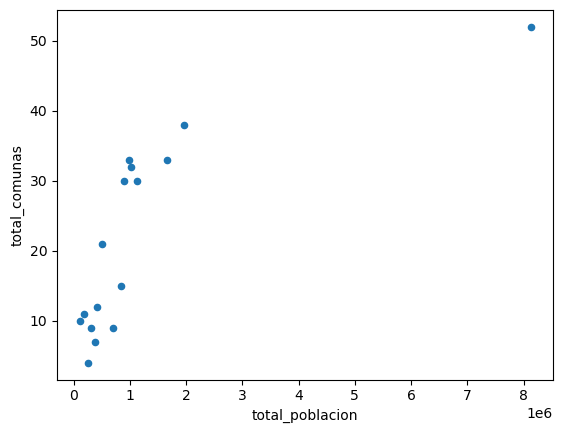

In [7]:
resultado.plot.scatter("total_poblacion", "total_comunas") # Gráfico de dispersión

### **Librerías: Visualización de datos**

La visualización es una parte esencial de cualquier análisis de datos, ya que facilita la comprensión de complejas estructuras de datos y resalta patrones, tendencias y anomalías en los datos. En sí, la visualización nos permite

1. Una comprensión rápida de los datos
2. Descubrimiento de patrones
3. Tomar mejores decisiones

La librería más común para la visualización de datos es [**Matplotlib**](https://matplotlib.org/).

### Matplotlib


![](https://matplotlib.org/stable/_images/sphx_glr_scatter_demo2_001.png)
> *Ejemplo de un gráfico realizado con matplotlib*

Matplotlib es la librería más usada en cuanto visualización. Tiene una enorme versatilidad, permitiendole al usuario crear desde histogramas y diagramas de dispersión hasta gráficos tridimensionales. Para importar el módulo que permite realizar gráficos debemos importar `pyplot` desde `matplotlib`, la forma más usual de hacer esto es:
```python
import matplotlib.pyplot as plt
```

Algunos de los tipos de gráficos que se pueden crear con Matplotlib son:

1. `plot`: Líneas
2. `hist`: Histograma
3. `scatter`: Dispersión
4. `bar` y `barh`: Barras (y barras horizontales)
5. `pie`: Torta
6. `boxplot`: Diagramas de caja
7. `errorbar`: Gráficos de error
8. `imshow`: Imágenes

Pueden visitar la [documentación de Matplotlib](https://matplotlib.org/stable/api/pyplot_summary.html#adding-data-to-the-plot) para más información.

Adicionalmente a crear un gráfico, podemos personalizarlo modificando la escala del gráfico (por ejemplo, pasar a escala logarítmica uno de los ejes), cambiar las etiquetas de los ejes, agregar un título, una leyenda, etc.

#### **Gráfico de Líneas**

El gráfico más sencillo, y con cual iniciamos es el gráfico de líneas. Este muestra la evolución de una variable a lo largo del tiempo o de otra variable continua. Es ideal para analizar tendencias temporales o series de tiempo.

A continuación se explica la creación de un Gráfico de Líneas. Con el método `plt.plot()` dibuja una línea conectando los puntos definidos por las listas x (eje X) e y (eje Y). Dentro del método `plt.plot()` esta la propiedad `marker='.'` que agrega un marcador en cada punto de datos. Y la propiedad `ls="--"` que agrega la línea discontinua (guiones).

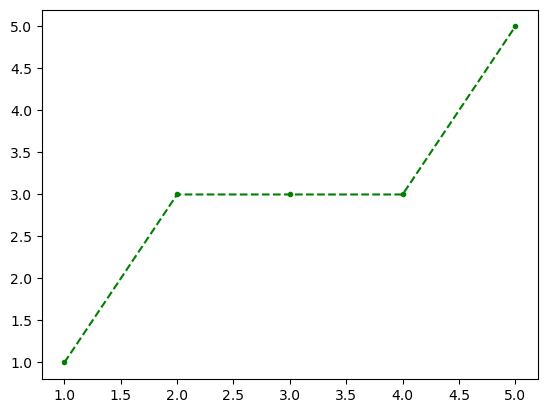

In [8]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [1,3,3,3,5]

plt.plot(x, y, marker='.', ls="--", color="green") # gráfico de línea con marcadores
plt.show() # mostramos el gráfico

In [9]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line pro

In [10]:
import numpy as np

# generamos 1000 elementos con media 0 y std 1
x = np.random.normal(0, 1, 1000)
# generamos 1000 elementos con media 1 y std 1
y = np.random.normal(1, 1, 1000)

#### **Histograma**

Este tipo de gráfico sirve para visualizar la distribución de frecuencias de un conjunto de datos numéricos. Permite identificar la forma de la distribución, la presencia de sesgos, valores atípicos y la dispersión de los datos.

En el ejemplo a continuación se muestra la creación de un histograma básico. Con el método `plt.hist()` se crea un histograma de los datos en `x`, dividiendo el rango de valores en 20 "bins" (barras). El histograma muestra la frecuencia de los valores de `x` en cada rango.

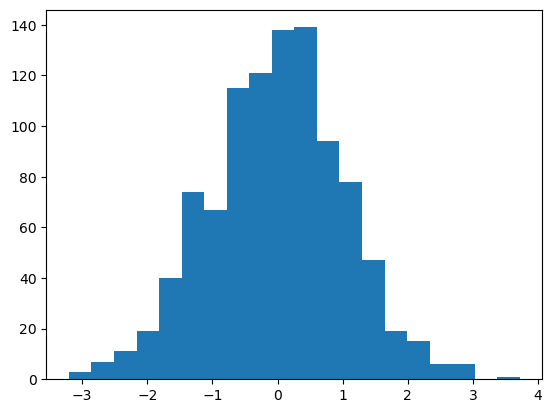

In [11]:
# histograma
plt.hist(x, bins=20)
plt.show()

#### **Dos Histogramas en la Misma Figura**

En este ejemplo se añaden dos histogramas diferentes en una misma figura. Se duplica el método `plt.hist()` uno para los elementos de `x` y otro para los elementos de `y`. Aquí se ocupa la propedad `alpha` para la opacidad, y dejar las barras semitransparentes.

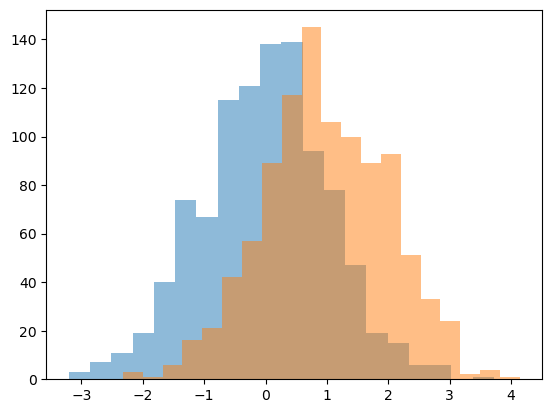

In [12]:
# Matplotlib genera un nuevo color por cada elemento agregado al gráfico
plt.hist(x, bins=20, alpha=0.5) # alpha es la opacidad
plt.hist(y, bins=20, alpha=0.5)
plt.show()

#### **Histogramas Personalizados**

En este último ejemplo de histograma, se personaliza aún más el gráfico, y se agrega por ejemplo: la propiedad `label`, que permite añadir una leyenda que estará sobre el gráfico. La propiedad `color`, permite añadir un código hexadecimal para indicar el color de cada barra.

Luego para que aparezcan los *labels* agregados anteriormente, se utiliza el método `plt.legend()` el cual tiene la propiedad `loc`, que permite pasar la posición donde se ubicará la leyenda. La propiedad `title` que va dentro del método `plt.legend()` añade un título a la leyenda.

Finalmente, se agregan un título general al gráfico con `plt.title()` y etiquetas a los ejes X e Y para mejorar la claridad y presentación con los métodos `plt.xlabel()` e `plt.ylabel()`.

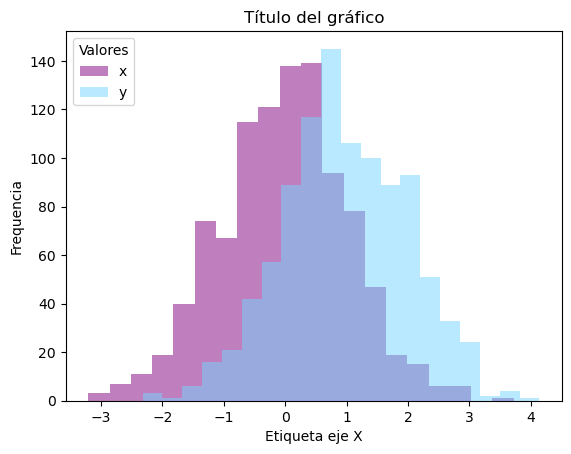

In [13]:
# Podemos estilizar nuestros histogramas
plt.hist(x,
         bins=20,        # número de rangos (rectángulos) a usar
         alpha=0.5,      # alpha agrega opacidad
         label="x",      # una etiqueta para la leyenda
         color="purple") # nosotros mismos elegimos el color

# El color puede ser un nombre, así como un código hexadecimal
plt.hist(y, bins=20, alpha=0.5, label="y", color="#74d5ff")

# El método legend() necesita la propiedad label del método hist()
plt.legend(loc="upper left", # Leyenda ubicada en la esquina superior izquierda
           title="Valores")  # Título para la leyenda

plt.title("Título del gráfico")
plt.xlabel("Etiqueta eje X")
plt.ylabel("Frequencia")
plt.show()

#### **Gráfico de Dispersión (Scatter Plot)**

Este tipo de gráfico, permite observar la relación entre dos variables numéricas. Es útil para detectar patrones, tendencias, correlaciones y posibles valores atípicos entre las variables.

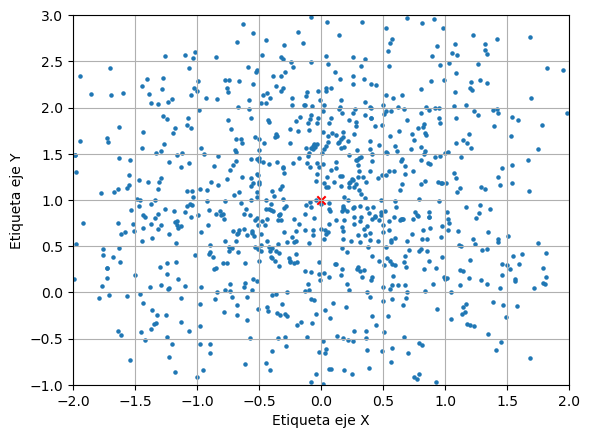

In [14]:
# Se gráfica el scatter plot de x e y
plt.scatter(x, y, s=5) # s=5 es el tamaño de los puntos

# sabemos que el punto 0,1 debería ser el centro
plt.scatter(0, 1, marker="x", color="red")

# El método grid() agrega la grilla en cualquier gráfico
plt.grid() # agregamos una grilla
plt.xlim([-2, 2]) # modificamos los límites del eje x
plt.ylim([-1, 3]) # modificamos los límites del eje y
plt.xlabel("Etiqueta eje X")
plt.ylabel("Etiqueta eje Y")
plt.show()

#### **Gráfico de Dispersión (Modificación del figsize)**

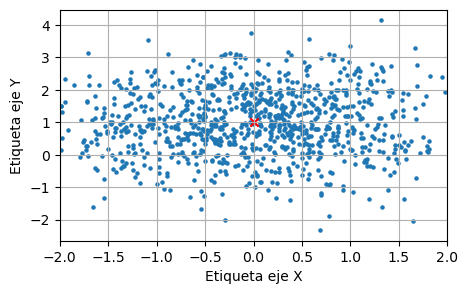

In [15]:
# Podemos modificar el tamaño usando figsize=(tamaño_x, tamaño_y)
fig, axes = plt.subplots(figsize=(5,3))
plt.scatter(x, y, s=5) # s=5 es el tamaño de los puntos
plt.scatter(0, 1, marker="x", color="red")
plt.grid()
plt.xlim([-2, 2])
plt.xlabel("Etiqueta eje X")
plt.ylabel("Etiqueta eje Y")
plt.show()

#### **Gráfico de Dispersión (Utilizando ax)**

Método más ocupado para generar gráficos

<class 'matplotlib.axes._axes.Axes'>


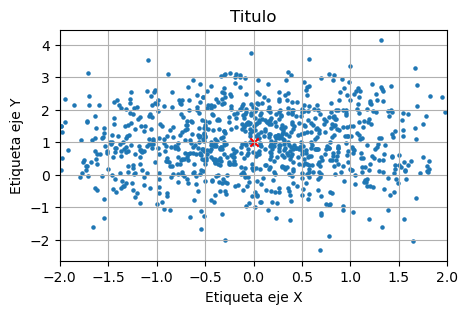

In [16]:
# Similar, pero usando el elemento ax (del tipo axes)
fig, ax = plt.subplots(figsize=(5,3))
print(type(ax))
ax.scatter(x, y, s=5) # s=5 es el tamaño de los puntos
ax.scatter(0, 1, marker="x", color="red")
ax.grid()
ax.set_xlim([-2, 2])
ax.set_xlabel("Etiqueta eje X")
ax.set_ylabel("Etiqueta eje Y")
ax.set_title("Titulo")
plt.savefig("resultado.pdf", bbox_inches="tight") #bbox_inches, saca los espacios blancos del contorno del gráfico
plt.show()

En Matplotlib, los `axes` (ejé en inglés) representan un gráfico (o subgráfico) dentro de una figura. Básicamente, corresponde a el espacio donde se dibujan los puntos de datos. La diferencia entre usar directamente `plt.` y `ax.` está en que el último te da más control, sobre todo en figuras que se componen de más de un gráfico.

#### **Gráfico de Barras (BarPlot)**
El gráfico de barras se utiliza para comparar cantidades entre diferentes categorías. Es ideal para visualizar y comparar valores de variables categóricas. A continuación, se muestra un clásico ejemplo para visualizar el stock de bebidas gaseosas.


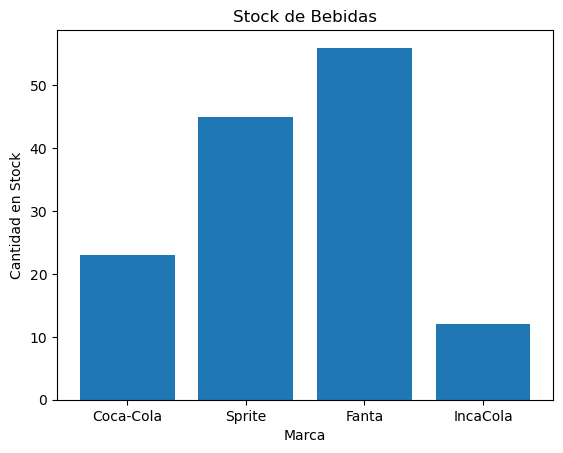

In [17]:
bebidas = ['Coca-Cola', 'Sprite', 'Fanta', 'IncaCola']
cantidad = [23, 45, 56, 12]

plt.bar(bebidas, cantidad)
plt.xlabel('Marca')
plt.ylabel('Cantidad en Stock')
plt.title('Stock de Bebidas')
plt.show()

#### **Gráfico de Barras Personalizado**
En este nuevo gráfico de barra se agregan mejoras versus el predecesor. Ahora se incluye etiquetas de datos sobre cada barra, lo que permite identificar fácilmente el valor exacto de cada categoría sin necesidad de estimarlo visualmente. Además, al tener 15 tipos de bebidas, se rota el nombre de cada bebida en el eje X para evitar que se sobrepongan y asegurar que todas las etiquetas sean legibles, mejorando así la presentación y claridad del gráfico.

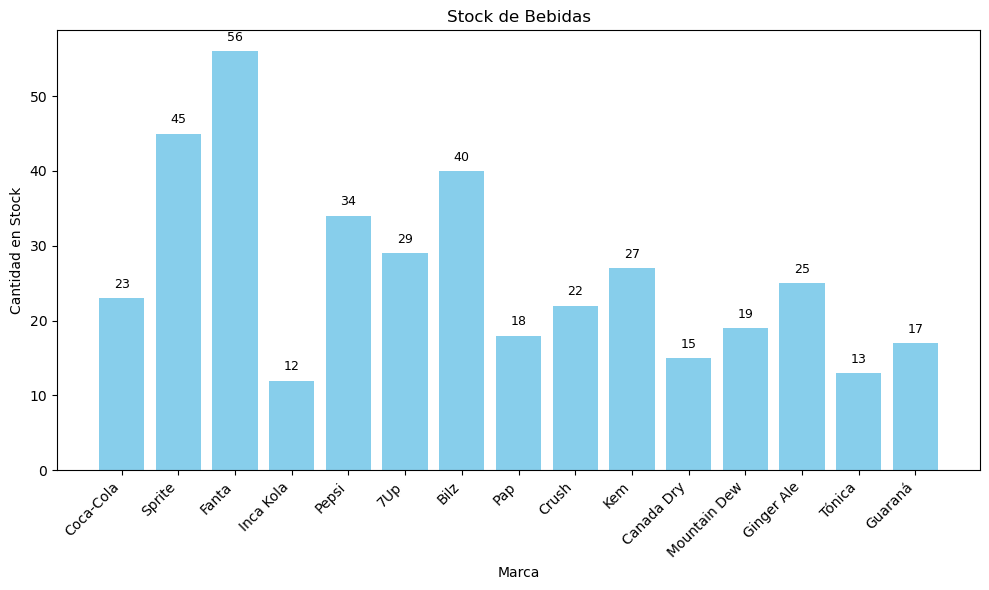

In [18]:
# Lista de 15 tipos de bebidas y sus valores
marcas = [
    'Coca-Cola', 'Sprite', 'Fanta', 'Inca Kola', 'Pepsi', '7Up', 'Bilz', 'Pap', 'Crush',
    'Kem', 'Canada Dry', 'Mountain Dew', 'Ginger Ale', 'Tónica', 'Guaraná'
]
stock = [23, 45, 56, 12, 34, 29, 40, 18, 22, 27, 15, 19, 25, 13, 17]

plt.figure(figsize=(10, 6))
barras = plt.bar(marcas, stock, color='skyblue')

# Agrega etiquetas de datos sobre cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 1, str(altura), # el get_x() obtiene la posición x de la barra, get_width() obtiene el ancho de la barra
             ha='center', va='bottom', fontsize=9) # ha='center' alinea el texto horizontalmente al centro de la barra, va='bottom' lo alinea verticalmente al fondo de la barra

plt.xlabel('Marca')
plt.ylabel('Cantidad en Stock')
plt.title('Stock de Bebidas')
# El método xticks() permite rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha='right') # La propiedad rotation rota las etiquetas del eje X
plt.tight_layout()
plt.show()

#### **Gráfico de Torta (Pie Chart)**
El gráfico de torta muestra proporciones relativas de un total, dividiendo un círculo en sectores. Es útil para visualizar la composición porcentual de un conjunto de categorías.

En el ejemplo a continuación, tomamos la listas ya creadas de `bebidas` y `cantidad` para representarlos en un gráfico circular.


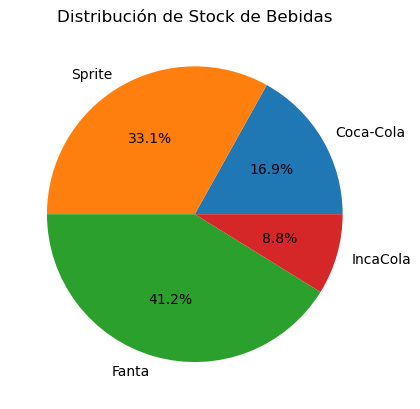

In [19]:
bebidas = ['Coca-Cola', 'Sprite', 'Fanta', 'IncaCola']
cantidad = [23, 45, 56, 12]

# cantidad: valores numéricos para cada porción
# labels: nombres de cada porción
# autopct: formato para mostrar el porcentaje en cada porción
plt.pie(cantidad, labels=bebidas, autopct='%1.1f%%')
plt.title('Distribución de Stock de Bebidas')
plt.show()

#### **Gráfico de Torta Personalizado**

En el siguiente ejemplo, se han realizado varias mejoras visuales respecto al gráfico de torta anterior:

- Se utiliza una paleta de colores personalizada para cada porción, lo que facilita distinguir cada categoría.
- Se aplica la opción `explode` para separar levemente cada porción y destacar mejor las diferencias.
- Se agrega una sombra (`shadow=True`) para dar profundidad al gráfico.
- Se ajusta el tamaño de la figura para una mejor visualización.
- Se rota el inicio del gráfico (`startangle`) para una presentación más estética.

Estas mejoras permiten que el gráfico sea más claro, atractivo y fácil de interpretar

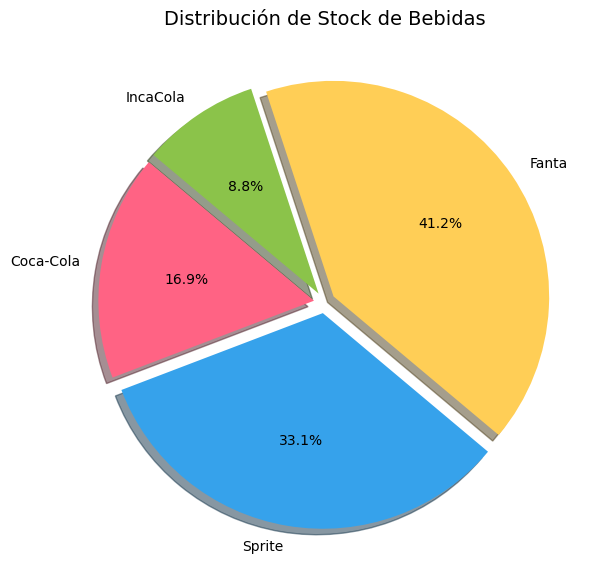

In [20]:
bebidas = ['Coca-Cola', 'Sprite', 'Fanta', 'IncaCola']
cantidad = [23, 45, 56, 12]

# Definición de la paleta de colores personalizada para cada porción
colores = ['#FF6384', '#36A2EB', '#FFCE56', '#8BC34A']

# Creamos el gráfico de torta con mejoras visuales. El método figure() permite ajustar el tamaño de la figura
plt.figure(figsize=(7, 7))  # Ajustamos el tamaño de la figura

# explode: separa levemente cada porción para destacarlas
# shadow: agrega una sombra para dar profundidad
# startangle: rota el inicio del gráfico para mejor presentación
plt.pie(
    cantidad,
    labels=bebidas,
    autopct='%1.1f%%',
    colors=colores,
    explode=[0.05]*4,   # separa todas las porciones un poco
    shadow=True,        # agrega sombra
    startangle=140      # ángulo de inicio
)

plt.title('Distribución de Stock de Bebidas', fontsize=14)
plt.show()

#### **Mapa de Calor (Heatmap)**
El heatmap o mapa de calor es una herramienta visual que permite representar valores numéricos contenidos en una matriz mediante una escala de colores. Cada celda de la matriz se colorea según el valor que contiene, facilitando la identificación de patrones, tendencias, agrupaciones o valores atípicos en los datos. Es ideal para visualizar correlaciones entre variables o patrones en tablas de datos.

En el siguiente ejemplo, se genera una `matriz de 20 x 20` con valores aleatorios entre 0 y 1. El gráfico muestra cómo varían estos valores a lo largo de las filas y columnas, utilizando la paleta de colores `'viridis'`. Además, se incluye una barra de color que indica la correspondencia entre los colores y los valores numéricos. Este tipo de visualización es útil para analizar correlaciones, similitudes o diferencias en conjuntos de datos tabulares.

In [21]:
# Matriz de ejemplo (20 x 20)
datos = np.random.rand(20, 20)

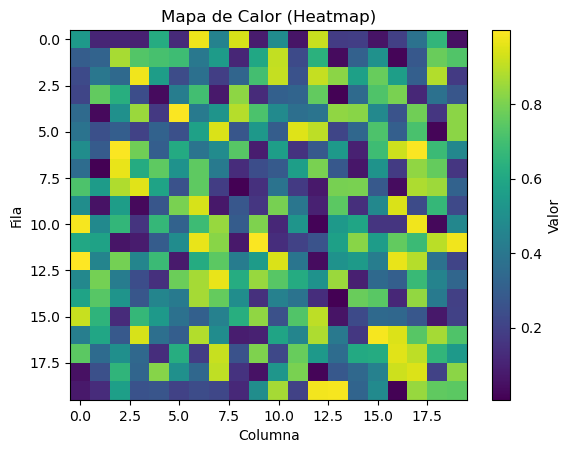

In [22]:
# Se crea el heatmap usando imshow()
plt.imshow(datos, cmap='viridis', aspect='auto')  # cmap define la paleta de colores, aspect='auto' ajusta la visualización
plt.colorbar(label='Valor')  # Barra de color que indica la escala de valores representados por los colores

plt.title('Mapa de Calor (Heatmap)')  
plt.xlabel('Columna')                
plt.ylabel('Fila')                   
plt.show()  

#### **Gráfico de Serie Temporal con Barras de Error**
A continuación se gráfica una serie temporal, donde la línea o curva punteada representa los datos originales, reales o predichos sin considerar la incertidumbre o el error. Y la serie con error es la línea o área que muestra la incertidumbre asociada a cada punto de la serie (se representa en este caso con Barras de Error, que son líneas verticales que muestran un rango de posible error en cada punto).

Estos gráficos son útiles para visualizar la variabilidad o incertidumbre de las predcciones o mediciones.



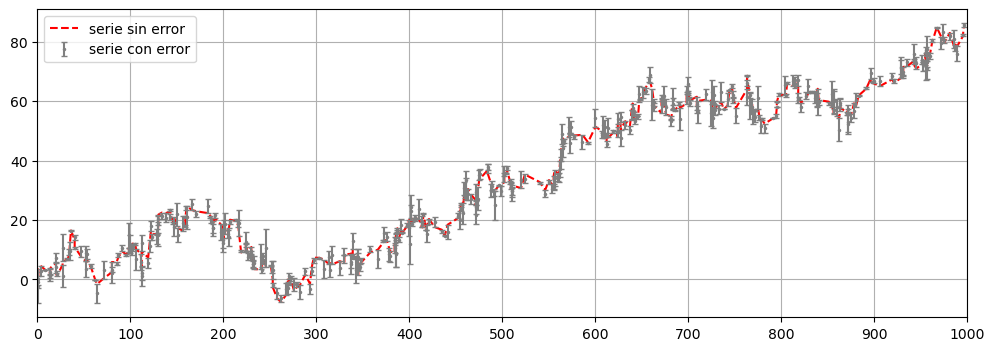

In [23]:
# Simulación de una serie temporal con barras de error
np.random.seed(42)  # Fijamos la semilla para reproducibilidad de números aleatorios

# Se generan 400 puntos de tiempo aleatorios entre 0 y 1000
x = np.random.choice(1000, 400) 
x = np.sort(x)  # Ordenamos los puntos en el eje X (tiempo)

# Se genera los valores de la serie y un error asociado a cada punto
y_error = np.random.normal(0, 2, len(x))  # Error aleatorio con media 0 y desviación estándar 2
y = np.cumsum(np.random.normal(0, 2,  len(x)))  # Serie acumulada simulada
y += y_error  # Sumamos el error a la serie

# Creación de la figura y ajuste del tamaño
fig = plt.figure(figsize=(12,4))

# Se gráfica la serie original (sin error) como línea punteada roja
plt.plot(x, y - y_error, linestyle="--", label="serie sin error", color="red")

# Se gráfica la serie con barras de error (errorbar)
plt.errorbar(
    x, y, yerr=np.abs(y_error),  # yerr: magnitud del error en cada punto
    linestyle='',                # Sin línea, solo puntos
    marker='.', markersize=3,    # Marcador pequeño para cada punto
    capsize=2, color="gray",     # Tamaño de la "tapa" de la barra de error
    label="serie con error"
)

plt.legend()  
plt.grid()    # grilla para facilitar la lectura
plt.xlim([0, 1000])  # Limitamos el eje X de 0 a 1000
plt.xticks(range(0, 1001, 100))  # Divisiones cada 100 en el eje X
plt.show() 

### **Integración con Pandas y Visualización**

Pandas integra de forma directa la funcionalidad de Matplotlib, permitiendo crear gráficos fácilmente a partir de los datos almacenados en un DataFrame. Esto facilita la exploración y el análisis visual de los datos sin necesidad de transformar los datos a otros formatos.

Para ilustrar esta integración, vamos a utilizar famoso conjunto de datos de la **Flor Iris**. Este dataset es uno de los más utilizados en la literatura de ciencia de datos y aprendizaje automático, ya que contiene mediciones de largo y ancho de sépalos y pétalos de tres especies distintas de iris: *Iris-setosa*, *Iris-versicolor* e *Iris-virginica*. 

Cada fila representa una flor y cada columna una característica.

A continuación, se muestra cómo cargar el dataset y visualizarlo, aprovechando la integración entre Pandas y Matplotlib para crear gráficos de dispersión y otras visualizaciones útiles para el análisis exploratorio de datos.

<div>
<img src="https://i.ibb.co/xq1q2MRX/flor-de-iris.png" width=700/>
</div>

- **Nota: Si quieres descargar el dataset, crear una cuenta en Kaggle y visitar el enlace: https://www.kaggle.com/datasets/uciml/iris**

### **Trabajando con el Dataset de Flor de Iris**

In [25]:
import pandas as pd

# Cargamos el dataset de Iris directamente desde una URL en formato CSV
# Este dataset contiene mediciones de sépalos y pétalos de tres especies de flores.
df_iris = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv")

print(df_iris.shape)

# Muestra aleatoria de 5 filas para explorar el contenido del DataFrame
df_iris.sample(5) 

(150, 5)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
26,5.0,3.4,1.6,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
143,6.8,3.2,5.9,2.3,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica


#### **Gráfico de Dispersión Base**

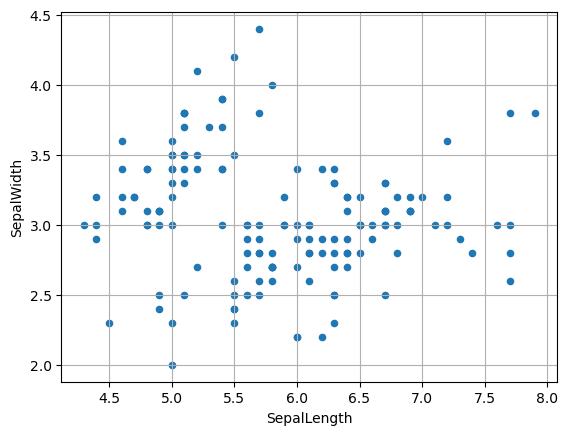

In [26]:
# Se gráfica directamente dos columnas
ax = df_iris.plot.scatter("SepalLength", "SepalWidth")
plt.grid() # grilla
plt.show()

#### **Impresión única de Valores Columna (Name)**
A continuación se utiliza la siguiente linea de código para mostrar todas las especies de flores presentes en el `dataset Iris`. Esto permite identificar rápidamente las distintas clases o categorías que existen en la columna `"Name"`, facilitando el análisis exploratorio y la comprensión de la diversidad de datos antes de realizar visualizaciones o modelos de clasificación.

In [27]:
print(df_iris["Name"].unique()) # unique devuelve un arreglo con todos los nombres distintos que aparecen en la columna 'Name'

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### **Gráfico de Dispersión de SepalLength vs SepalWidth por Especie de Iris**

El siguiente gráfico muestra la relación entre el largo y el ancho del sépalo para cada especie de flor en el dataset Iris. Cada especie se representa con un color y marcador diferente, lo que facilita la comparación visual entre las clases.

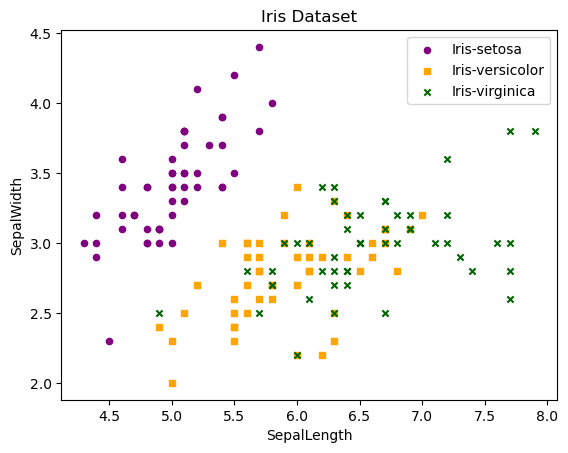

In [ ]:
# Podemos agregar color según Name
# Debemos inicializar una figura, y decirle que grafique siempre en el mismo ax
fig, ax = plt.subplots() # tamaño por defecto

# Asignamos colores (Diccionario)
colors = {"Iris-setosa": "purple",
          "Iris-versicolor" : "orange",
          "Iris-virginica" : "darkgreen"}

# Asignamos marcadores (Diccionario)
markers = {"Iris-setosa": "o",
          "Iris-versicolor" : "s", # squares
          "Iris-virginica" : "x"}

for name in df_iris["Name"].unique():         # para cada nombre único
  df_name = df_iris[df_iris["Name"] == name]  # encontrar el subset de ese nombre
  df_name.plot.scatter("SepalLength",         # graficar SepalLength en x
                       "SepalWidth",          # graficar SepalWifth en y
                       ax=ax,                 # grafica sobre ax
                       color=colors[name],    # utilizael color asignado
                       marker=markers[name],  # utiliza  el marcador asignado
                       label=name)            # agrega el nombre como etiqueta
ax.set_title("Iris Dataset")
ax.legend() # Mostramos las etiquetas generadas
plt.show()

#### **Gráfico BoxPlot**
Este tipo de gráfico resume la distribución de un conjunto de datos mostrando la mediana, los cuartiles y los posibles valores atípicos. Es útil para comparar distribuciones entre diferentes grupos.

#### **Boxplot de SepalLength según Especie de Iris**

El boxplot generado a continuación compara la distribución del largo del sépalo (`SepalLength`) para cada una de las especies de flores presentes en el dataset Iris. En el eje X se muestran las diferentes especies (`Name`), y en el eje Y los valores de largo del sépalo.

Cada caja (box) representa la dispersión de los datos para una especie: **la línea central** indica la **mediana**, los bordes de la caja corresponden al **primer y tercer cuartil (Q1 y Q3)**, y los **extremos** muestran el rango de valores que no se consideran atípicos. Los puntos fuera de los **extremos** son valores atípicos *(outliers)*.

Este gráfico permite comparar visualmente cómo varía el largo del sépalo entre especies. Por ejemplo, si una especie tiene una mediana más alta, significa que en promedio sus sépalos son más largos. Si la caja es más ancha, indica mayor variabilidad en esa especie. Así, el boxplot facilita identificar diferencias y similitudes en la morfología de las flores entre las distintas clases.

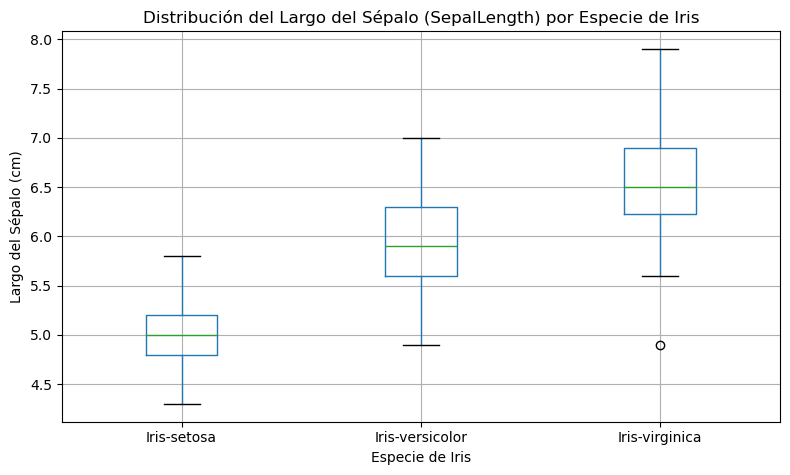

In [29]:
# Un boxplot de SepalLength según Name

# Se crea la figura y ejes manualmente
fig, ax = plt.subplots(figsize=(8, 5))

# Se dibuja el boxplot en el eje que creamos
df_iris.boxplot(
    column="SepalLength",    # variable a graficar
    by="Name",               # agrupación
    ax=ax                    # eje donde dibujar
)

# Eliminación del título automático
fig.suptitle("")

# Título personalizado
ax.set_title("Distribución del Largo del Sépalo (SepalLength) por Especie de Iris")

# Etiquetas de los ejes
ax.set_xlabel("Especie de Iris")
ax.set_ylabel("Largo del Sépalo (cm)")

# Ajustando el layout
plt.tight_layout() # tight_layout ajusta el espacio entre los elementos del gráfico
plt.show()

#### **Gráficos en un Esquema 1x3**

En el siguiente bloque de código se genera una figura compuesta por tres gráficos de dispersión `(scatter plots)` dispuestos horizontalmente en una sola fila. Para ello, se utiliza la función `plt.subplots(1, 3, figsize=(12,3))`, que crea una **figura (fig)** y un arreglo de tres ejes **(axes)**, cada uno destinado a un gráfico independiente.


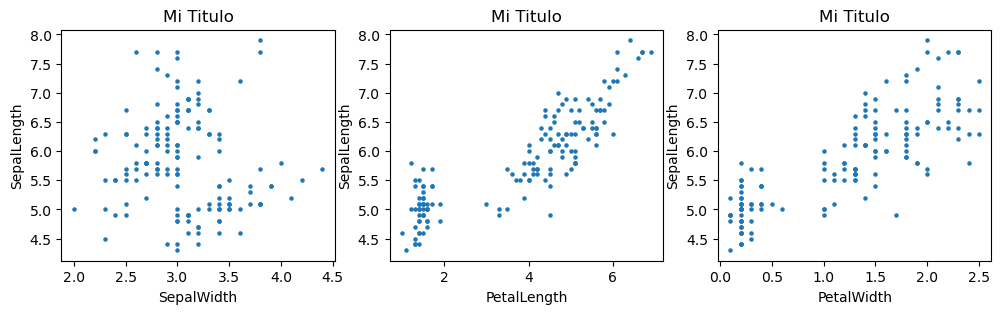

In [30]:
# En este caso axes es una array de dimension 3
fig, axes = plt.subplots(1, 3, figsize=(12,3))
col_y = "SepalLength" # Eje y de todos los gráficos
columnas = list(df_iris.columns[1:-1])

# Recorre las columnas y grafica cada una contra col_y
for i in range(len(columnas)):
   col_x = columnas[i] # Eje x de cada gráfico
   ax = axes[i] # Accede al eje correspondiente
   ax.scatter(df_iris[col_x], df_iris[col_y], s=5) # s=5 es el tamaño de los puntos
   ax.set_xlabel(col_x)
   ax.set_ylabel(col_y)
   ax.set_title('Mi Titulo')
#plt.subplots_adjust(wspace=0.5) #Espacio entre gráficos
plt.show()

#### **¡Veamos que hay en axes!**


In [31]:
axes

array([<Axes: title={'center': 'Mi Titulo'}, xlabel='SepalWidth', ylabel='SepalLength'>,
       <Axes: title={'center': 'Mi Titulo'}, xlabel='PetalLength', ylabel='SepalLength'>,
       <Axes: title={'center': 'Mi Titulo'}, xlabel='PetalWidth', ylabel='SepalLength'>],
      dtype=object)

#### **¿ Y si queremos que algo así funcione para cualquier Dataframe?**

**¡Podemos crear una función!**

<!--
def graficar_columnas(df, col_y, lista_columnas):
  columnas = list(lista_columnas) # nos aseguramos que es una lista
  total_cols = len(columnas)
  fig, axes = plt.subplots(1, total_cols, figsize=(4*total_cols, 3))
  for i in range(total_cols):
    col_x = columnas[i]
    axes[i].scatter(df[col_x], df[col_y], s=5)
    axes[i].set_xlabel(col_x)
    axes[i].set_ylabel(col_y)
  plt.show()
-->

In [32]:
def graficar_columnas(df, col_y, lista_columnas):
  ...

# Esto debería dar el mismo grafico anterior
graficar_columnas(df_iris, "SepalLength", ["SepalWidth", "PetalLength", "PetalWidth"])

### **Seaborn**

Seaborn es una librería basada en Matplotlib que proporciona una interfaz de alto nivel para crear gráficos atractivos. De Seaborn podemos destacar que

1. Es estéticamente agradable: viene con estilos predefinidos que son visualmente atractivos.
2. Facilita la realización de gráficos complejos (como por ejemplo asignar colores a un gráfico de dispersión).
3. Tiene integración con Pandas.

La importación de Seaborn se hace típicamente con:
```python
import seaborn as sns
```

Dentro de su página web podemos encontrar una [galería de ejemplo](https://seaborn.pydata.org/examples/index.html), así como la [documentación](https://seaborn.pydata.org/api.html) de cada uno de los métodos

#### **Gráfico de Dispersión con Seaborn**

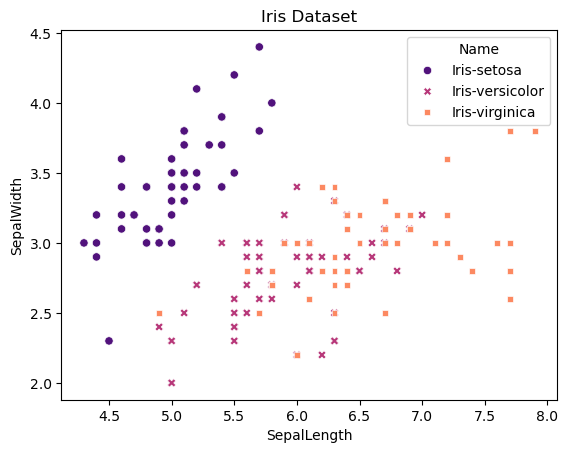

In [34]:
import seaborn as sns

# El mismo gráfico de dispersion con colores, pero con seaborn
ax = sns.scatterplot(data=df_iris, x="SepalLength", y="SepalWidth",
                     hue="Name",     # Decimos que coloree a nivel de Name
                     style="Name",   # Que el marcador también dependa de Name
                     palette="magma" # Definición de la paleta de colores
                     )
ax.set_title("Iris Dataset")
plt.show()

La paletas de colores puede ser un [mapa de colores de Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html), así como una [paleta definida con Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html).

*Nota: En Matplotlib (y en Pandas DataFrame.plot), este campo se llama `cmap`*

#### **Gráfico de Dispersión con Seaborn (Seteando Estilos)**

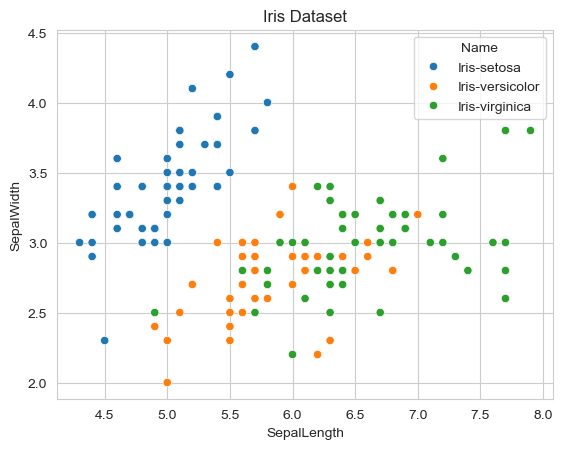

In [38]:
sns.set_style("whitegrid") # Podemos setear un estilo, añadiendo una cuadrícula blanca de fondo que facilita la lectura y comparación de los datos
ax = sns.scatterplot(data=df_iris, x="SepalLength", y="SepalWidth", hue="Name")
ax.set_title("Iris Dataset")
plt.show()

#### **Gráfico de Barras (BarPlot con Seaborn)**

A continuación se generá un `barplot` con el valor promedio del ancho del sépalo (SepalWidth) para cada especie de flor (Name). Cada barra indica el promedio de esa variable en la categoría correspondiente y, por defecto, `Seaborn` agrega una barra de error que muestra el *intervalo de confianza del 95%* para ese promedio.

                 count   mean       std  min    25%  50%    75%  max
Name                                                                
Iris-setosa       50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4
Iris-versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
Iris-virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8


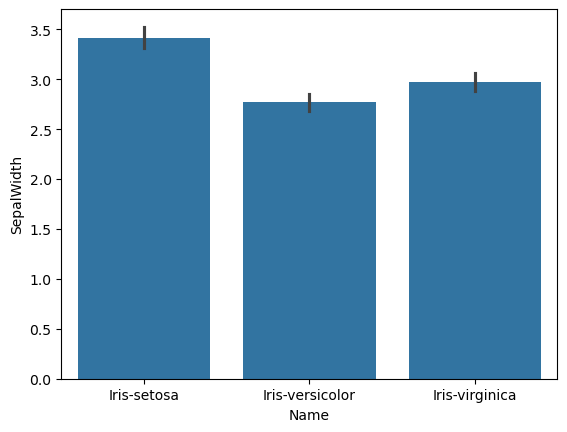

In [39]:
sns.reset_defaults() # Volvemos al estilo por defecto

print(df_iris.groupby("Name")["SepalWidth"].describe())

# Dado que hay varios valores de SepalWidth, por defecto graficará el promedio
# junto a un intervalo de confianza del 95%
ax = sns.barplot(data=df_iris, x="Name", y="SepalWidth" )
plt.show()

#### **Modificando el BarPlot**


Name
Iris-setosa        4.4
Iris-versicolor    3.4
Iris-virginica     3.8
Name: SepalWidth, dtype: float64


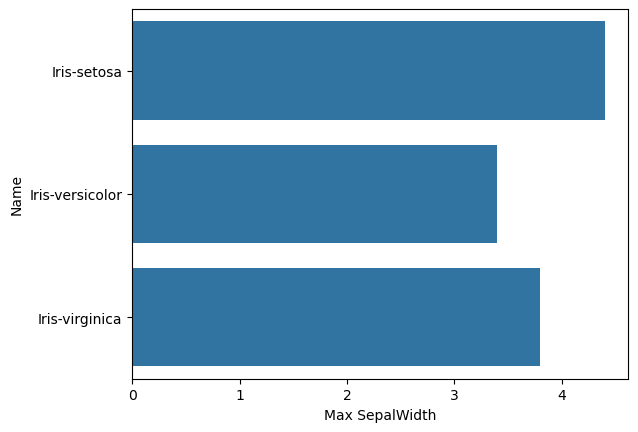

In [40]:
ax = sns.barplot(data=df_iris,
                 y="Name", x="SepalWidth",
                 orient="h",       # Orientacion horizontal, cambiamos y por x
                 estimator="max",  # Que grafique el valor máximo
                 errorbar=None)    # Sin barras de error
ax.set_xlabel("Max SepalWidth")
print(df_iris.groupby("Name")["SepalWidth"].max())
plt.show()

#### **Gráfico de Densidad**
Un gráfico de densidad es una visualización que muestra cómo se distribuyen los datos en un espacio determinado, permitiendo identificar zonas donde los valores se concentran.

La figura a continuación grafica la densidad conjunta de dos variables numéricas del dataset Iris: el `largo (SepalLength)` y el `ancho (SepalWidth)` del sépalo.

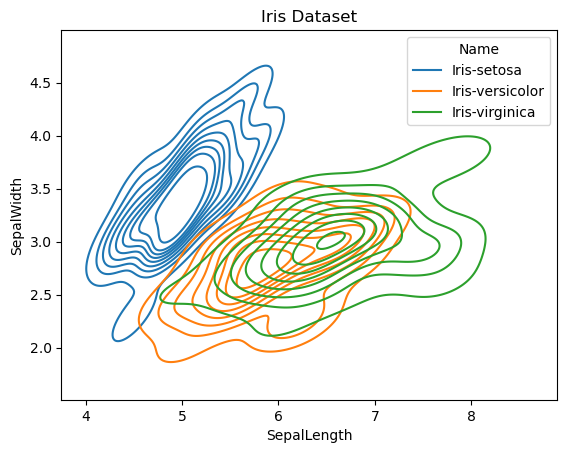

In [41]:
ax = sns.kdeplot(data=df_iris, x="SepalLength", y="SepalWidth", hue="Name") # kdeplot genera un gráfico de densidad
ax.set_title("Iris Dataset")
plt.show()

#### **Gráfico de Relaciones entre variables del dataset Iris**

A continuación se muestra la función `pairplot` de la librería `Seaborn` para visualizar las relaciones entre todas las variables numéricas del DataFrame `df_iris`.

Cada gráfico de dispersión muestra cómo se relacionan dos variables distintas, mientras que los gráficos en la diagonal muestran la distribución de cada variable individual.

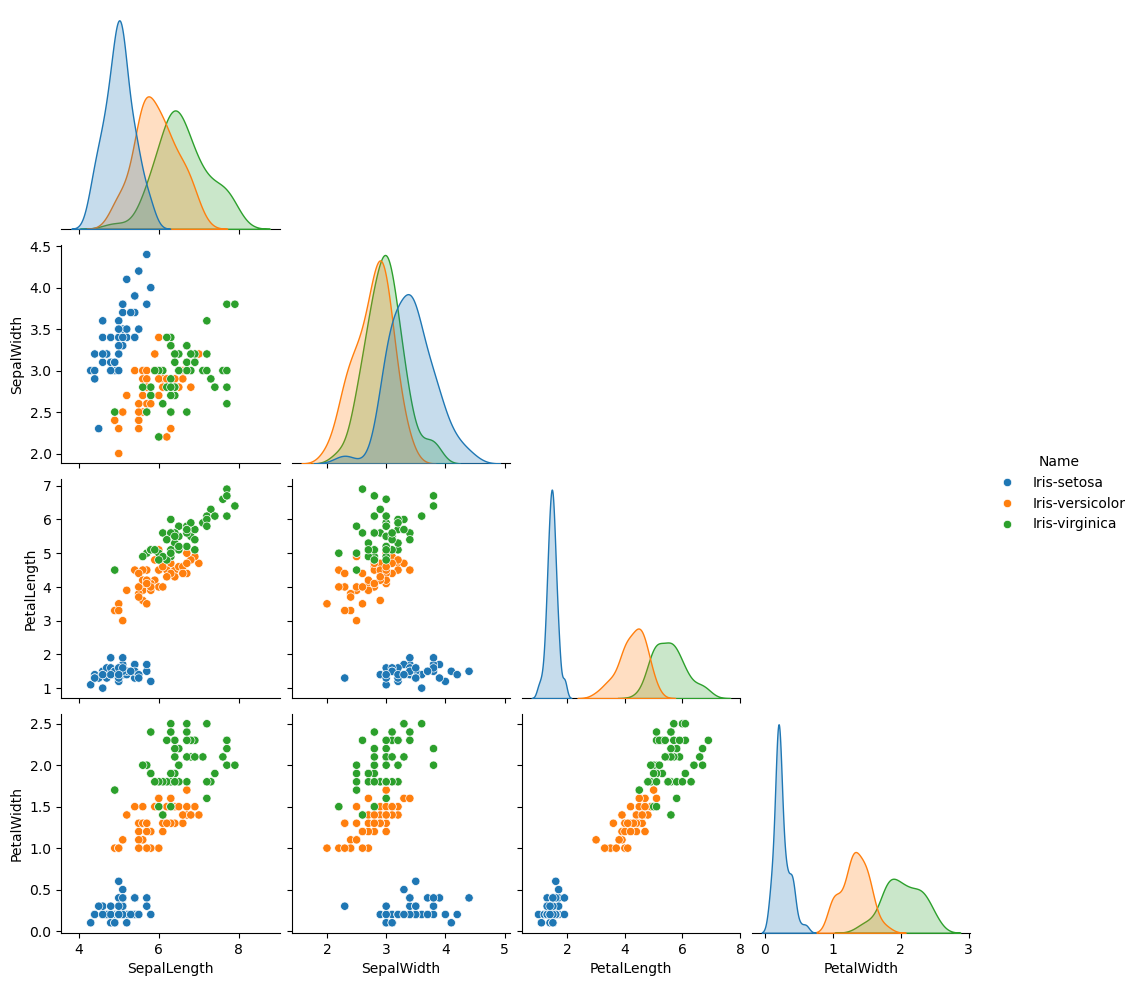

In [42]:
# Graficar las relaciones entre todas la columnas, usando una como color
# igual sirve para ver outliers
sns.pairplot(df_iris, hue="Name", corner=True) #corner true indica que se va imprimir solo el triangulo inferior de la matriz
plt.show()

### **Plotly**

Plotly es una librería que permite crear gráficos interactivos. Soporta múltiples lenguajes, entre ellos Python. Hay una galería con bastantes ejemplos: https://plotly.com/python/.

La forma más sencilla de usarlo es mediante [Plotly express](https://plotly.com/python/plotly-express/):

```python
import plotly.express as px
```

**IMPORTANTE: Corroborar que este instalado `nbformat`**

#### **Scatter Plot con Plotly**

In [43]:
import plotly.express as px

fig = px.scatter(df_iris, x="SepalWidth", y="SepalLength",
                 color="Name", # simil a "hue" en seaborn
                 width=700,    # ancho del gráfico
                 title="SepalWidth vs SepalLength"
                 )
fig.show()

#### **BoxPlot con Plotly**

In [44]:
# El mismo boxplot de antes
fig = px.box(df_iris, x='Name', y='SepalWidth', width=700,
             title='Distribución del Largo del Sépalo (SepalLength) por Especie de Iris')
fig.show()

#### **Relaciones entre variables del dataset Iris (Plotly)**
El ejemplo a continuación es similar al `sns.pairplot()` de **Seaborn** explicado anteriomente. La matriz de dispersión muestra cómo se relacionan todas las variables numéricas del conjunto de datos Iris, diferenciando por especie.

In [45]:
fig = px.scatter_matrix(df_iris, dimensions=df_iris.columns[:-1], color='Name', width=1000, height=900)
fig.show()

## **Extra: GeoPandas**

`Geopandas` es una librería de Python basada en Pandas que facilita el trabajo con datos geoespaciales. Pueden encontrar la documentación [en este enlace](https://geopandas.org/en/stable/docs.html).

Para usarla necesitamos un mapa vectorial (shapefile) e importarla:

```python
import geopandas as gpd
```

Si existe un problema de incompatibilidad entre `numpy`, `shapely` y `geopandas` actualizar las tres librerías en Anaconda:
```bash
conda install -c conda-forge numpy shapely geopandas --yes
```

Instalar los siguientes librerías, que pueden ser necesarias para el ejemplo: `requests` and `aiohttp`
```bash
conda install -c conda-forge requests aiohttp --yes
```

Por otro lado, se debe tener instalado `fsspec`. Esta librerías facilita el acceso a archivos en diferentes sistemas de almacenamiento.

Veamos un ejemplo sencillo de como utilizar `geopandas`:

In [46]:
import geopandas as gpd
import fsspec

url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"

In [47]:
gdf = gpd.read_file(url)

In [48]:
# Mostrar los primeros registros
gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.067, 180 -16.555, 179...."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.904 -0.95, 34.073 -1.0598, 37.699..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.6656 27.656, -8.6651 27.589, -8.6..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97 49.003, -1..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.03 4..."


#### **Listando todas las Columnas del GeoDataFrame**

In [49]:
print(list(gdf.columns))

['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

La columna `geometry` denota una figura geométrica que representa en este caso la forma de un país

In [50]:
gdf['geometry']

0      MULTIPOLYGON (((180 -16.067, 180 -16.555, 179....
1      POLYGON ((33.904 -0.95, 34.073 -1.0598, 37.699...
2      POLYGON ((-8.6656 27.656, -8.6651 27.589, -8.6...
3      MULTIPOLYGON (((-122.84 49, -122.97 49.003, -1...
4      MULTIPOLYGON (((-122.84 49, -120 49, -117.03 4...
                             ...                        
172    POLYGON ((18.83 45.909, 18.83 45.909, 19.596 4...
173    POLYGON ((20.071 42.589, 19.802 42.5, 19.738 4...
174    POLYGON ((20.59 41.855, 20.523 42.218, 20.284 ...
175    POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...
176    POLYGON ((30.834 3.5092, 29.953 4.1737, 29.716...
Name: geometry, Length: 177, dtype: geometry

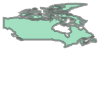

In [52]:
# Obtengamos por ejemplo, el índice 3 (Canadá)
gdf['geometry'].iloc[3]

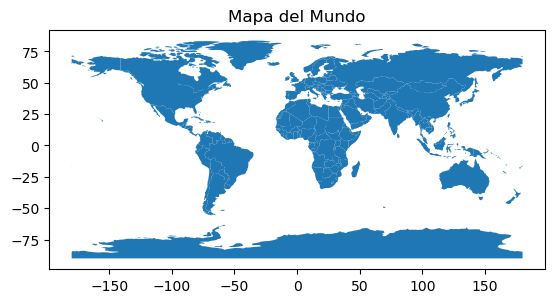

In [53]:
# Podemos graficar directamente todas las formas geométricas
gdf.plot()
plt.title("Mapa del Mundo")
plt.show()

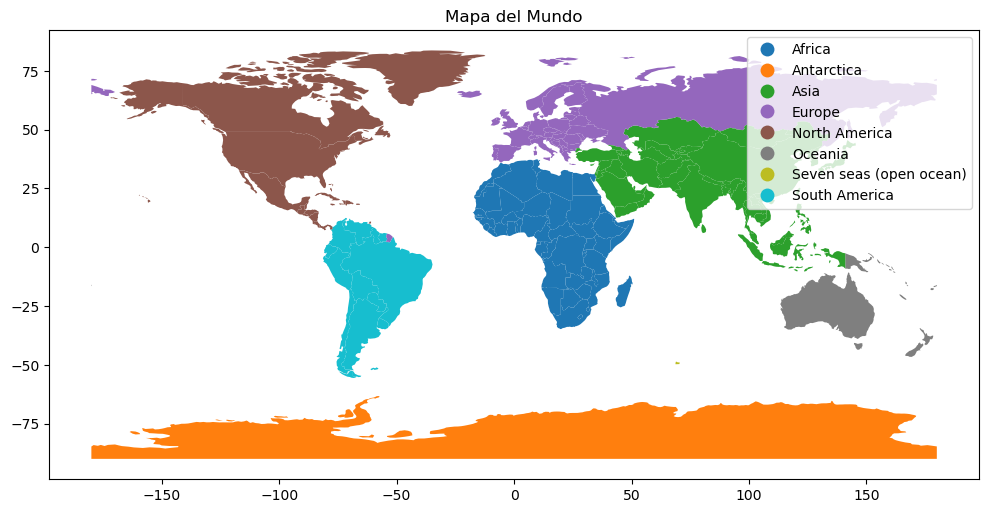

In [54]:
# Crear figura y ejes explícitamente y coloreamos por continente
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(column='CONTINENT', legend=True, ax=ax)

# Título
plt.title("Mapa del Mundo")
plt.show()

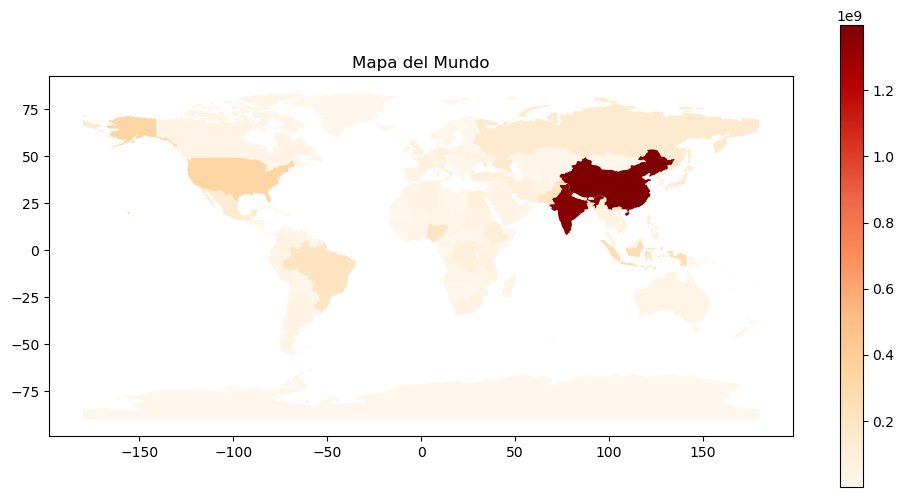

In [55]:
# Coloreamos por poblacion y cambiamos la paleta de colores
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(column='POP_EST', cmap='OrRd', legend=True, ax=ax)

# Título
plt.title("Mapa del Mundo")
plt.show()

Dado que actúa como un DataFrame, podemos aplicar los mismos filtros:

In [56]:
south_america = gdf[gdf['CONTINENT'] == 'South America']
south_america

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
9,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-68.634 -52.636, -68.25 -53.1,..."
10,Admin-0 country,1,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-68.634 -52.636, -68.633 -54.8..."
20,Admin-0 country,1,5,United Kingdom,GB1,1,2,Disputed,1,Falkland Islands,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51..."
28,Admin-0 country,1,4,Uruguay,URY,0,2,Sovereign country,1,Uruguay,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.625 -30.216, -56.976 -30.11, -55..."
29,Admin-0 country,1,2,Brazil,BRA,0,2,Sovereign country,1,Brazil,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-53.374 -33.768, -53.651 -33.202, -5..."
30,Admin-0 country,1,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.53 -10.952, -68.786 -11.036, -68..."
31,Admin-0 country,1,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.894 -4.2982, -70.795 -4.2513, -7..."
32,Admin-0 country,1,2,Colombia,COL,0,2,Sovereign country,1,Colombia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-66.876 1.2534, -67.065 1.1301, -67...."
40,Admin-0 country,1,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-60.734 5.2003, -60.601 4.9181, -60...."
41,Admin-0 country,1,4,Guyana,GUY,0,2,Sovereign country,1,Guyana,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-56.539 1.8995, -56.783 1.8637, -57...."


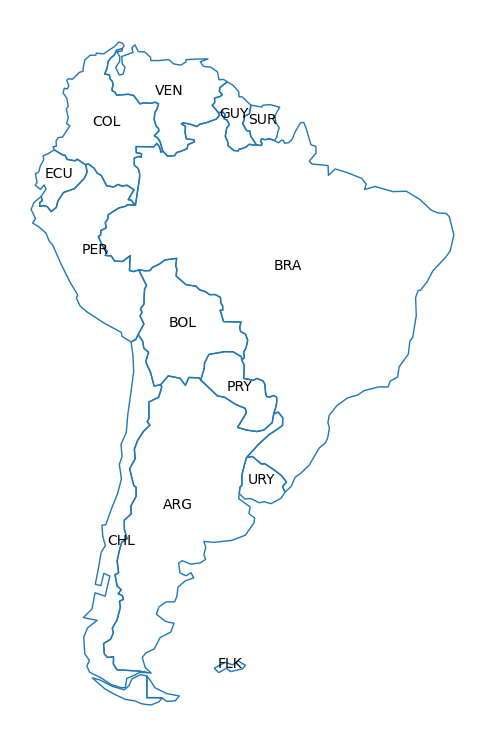

In [57]:
# Graficamos solo los límites
ax = south_america.boundary.plot(lw=1, figsize=(6, 12))
# Etiquetamos usando el centro de la geometría
south_america.apply(lambda x: ax.annotate(text=x['ISO_A3'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# Removemos todos los ejes
ax.axis('off')
plt.show()

En el caso de Chile, pueden encontrar shapes files usando la plataforma de la biblioteca nacional: https://www.bcn.cl/siit/mapas_vectoriales

